In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [39]:
data = load_iris()

In [40]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [41]:
df = pd.DataFrame(data['data'],columns = data['feature_names'])
target = pd.Series(data=data['target'])

In [42]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [44]:
X= df
y=target

In [45]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [46]:
#Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
##Selecting the K-Value
#With accuracy
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train_scaled,y_train,cv=10)
    
    accuracy.append(score.mean())

In [47]:
#for k = 5

Knn= KNeighborsClassifier(n_neighbors=5)
cls = knn.fit(X_train_scaled,y_train)
y_pred = cls.predict(X_test_scaled)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [49]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [50]:
##Selecting the K-Value
#With error rate
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train_scaled,y_train,cv=10)
    
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy')

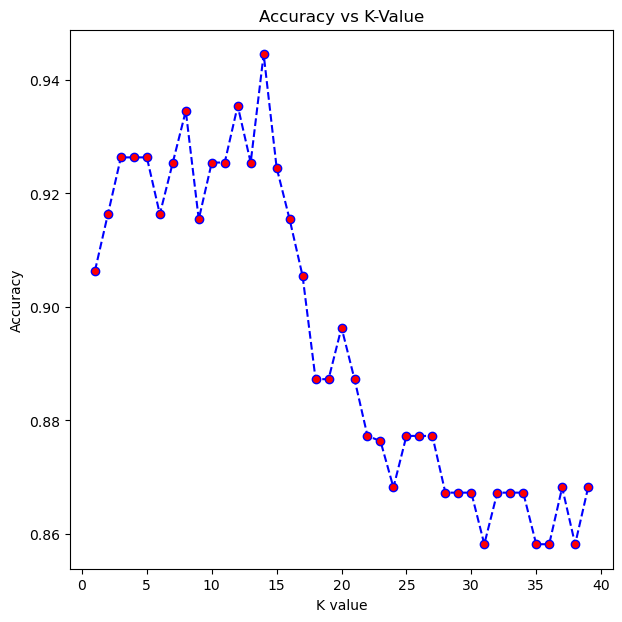

In [51]:
## Plot the accuracy rate
plt.figure(figsize=(7,7))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed',marker='o',markerfacecolor = 'red')
plt.title("Accuracy vs K-Value")
plt.xlabel('K value')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error')

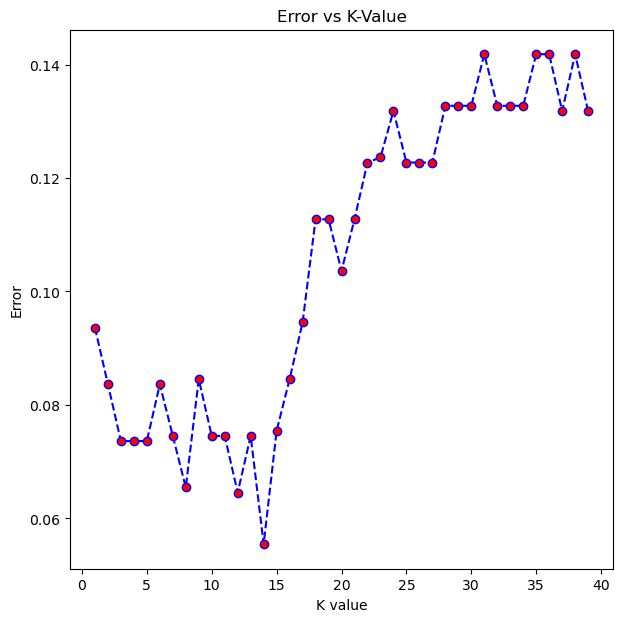

In [33]:
## Plot the error rate
plt.figure(figsize=(7,7))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle='dashed',marker='o',markerfacecolor = 'red')
plt.title("Error vs K-Value")
plt.xlabel('K value')
plt.ylabel('Error')

In [52]:
## We can come to a conclusion that we can choose between 4 to 10 since the fluctuation is very less in these range of K value